# BIOINF 305. Assignment - week 40.
## Assem Maratova

**Positive autoregulation**

* Implement code to reproduce Figures 5.4, 5.5 and 5.7 from Alon's book (2nd Edition). A copy of the relevant book pages is [available on Mitt](https://mitt.uib.no/courses/19572/files/folder/doc?preview=1964193).

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting some parameters for plots
plt.style.use('seaborn')
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
plt.rcParams['figure.figsize'] = 10 , 5  # default figure size
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title 

In [3]:
# Hill functions
def Hill_activator(x,K,n): 
    xn = np.power(x,n)
    Kn = np.power(K,n)
    f_X = xn/(Kn+xn)
    return f_X

def Hill_repressor(x,K,n): 
    f_X = 1.0 - Hill_activator(x,K,n)
    return f_X

def Hill_func(x, B, K, n):
    f_X = 1.0 + B*Hill_activator(x,K,n)
    return f_X

In [4]:
# Positive autoregulation model
def step_x(x,t,Bx,A,D):
    if (t>D[0] and t<D[1]):
        dxdt = Bx - (A*x)
    else:
        dxdt = -(A*x)
    return dxdt

def PAR(u,t,Bx,By1,By2,A,K,n,D):
    x,y = u
    dxdt = step_x(x,t,Bx,A,D)
    dydt = 1.0 + By1*Hill_activator(x,K,n) + By2*Hill_activator(y,K,n) - A*y
    return [dxdt,dydt]

In [5]:
# data for simulation
Bx, A = 3, 1
By1, By2 = 3 , 3
K = 2.5
n = 10
D = [1,4]
time = np.linspace(0,8,1000)

In [6]:
X = np.linspace(0,5,100)
Y = Hill_func(X, By1, K, n)

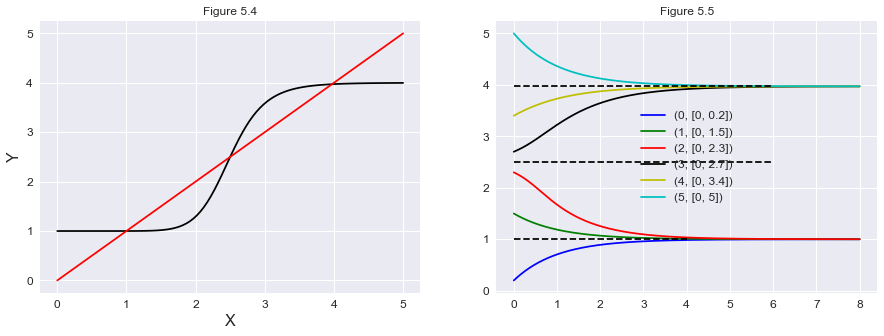

In [7]:
# find X_low, X_u, X_high
X_low  = Y[np.where((X-0.07<=Y) & (Y<=X+0.07))][:3].mean() 
X_u    = Y[np.where((X-0.07<=Y) & (Y<=X+0.07))][3:5].mean()
X_high = Y[np.where((X-0.07<=Y) & (Y<=X+0.07))][5:].mean() 

fig , [ax1, ax2] = plt.subplots(1,2, figsize = (15,5))

ax1.plot(X, Y, c = 'k')
ax1.plot(X, X, c = 'r')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Figure 5.4')

# set initial values 
initial_values = [[0,0.2], [0,1.5], [0,2.3], 
                  [0,2.7], [0,3.4], [0,5]]

colors = ['b', 'g', 'r', 'k', 'y', 'c']
for i, u0 in enumerate(initial_values):
    U = odeint(PAR, u0, time,
               args=(0,By1,By2,A,K,n,D))
    ax2.plot(time, U[:,1], c=colors[i], label=str((i, u0)))

ax2.plot([0,4], [X_low,X_low], c = 'k', ls = '--')
ax2.plot([0,6], [X_u,X_u], c = 'k', ls = '--')
ax2.plot([0,6], [X_high,X_high], c = 'k', ls = '--')
ax2.legend(loc='best')
ax2.set_title('Figure 5.5')
plt.show()

In [8]:
U = odeint(PAR, [0,1], time,
           args=(Bx,By1,By2,A,K,n,D))

fig , [ax1, ax2] = plt.subplots(2,1, figsize = (10,8))

ax1.plot(time, 1*(time>=D[0])&(time<=D[1]), c='k')
ax1.set_title('Figure 5.7')

ax2.plot(time, U[:,1], c='k', lw=3)
ax2.plot([0,7], [X_low,X_low], c = 'k', ls = '--')
ax2.plot([0,7], [X_high,X_high], c = 'k', ls = '--')

plt.show()

**The toggle switch**

* Implement code to reproduce Figures 5.9 and 5.10 from Alon's book (2nd Edition). A copy of the relevant book pages is [available on Mitt](https://mitt.uib.no/courses/19572/files/folder/doc?preview=1964194).

* Simulate the dynamics of a toggle switch in response to a pulse of activation of a TF Z which represses one factor of the switch and activates the other. Which input function (AND or OR) do you need to make Z flip the switch from one steady state to the other? How short can the pulse be to flip the switch?

In [9]:
def ToggleSwitch(u, t, Bx, By, A, K, n):
    x,y = u
    
    dxdt = Bx*Hill_repressor(y,K,n) - A*x
    dydt = By*Hill_repressor(x,K,n) - A*y

    return [dxdt, dydt]

In [10]:
# data for simulation
Bx, A = 4, 1
By = 4
K = 2.5
n = 10
time = np.linspace(0,8,1000)
initial_values = [[4.5,4], [4,4.5], [1, 0.5], [0.5, 1]]

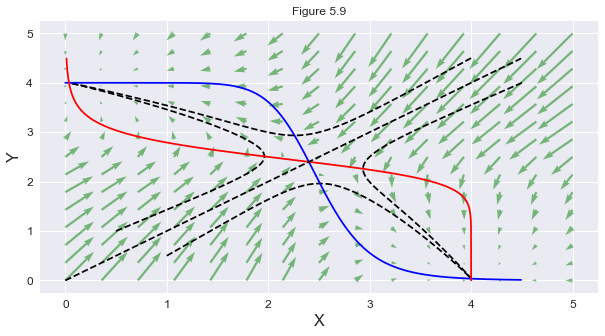

In [11]:
for i, u0 in enumerate(initial_values):
    U = odeint(ToggleSwitch, u0, time,
               args=(Bx,By,A,K,n))
    plt.plot(U[:,0], U[:,1], c='k', ls='--' )


plt.plot(time[time<=4.5],Bx*Hill_repressor(time[time<=4.5],K,n), c='b')
plt.plot(Bx*Hill_repressor(time[time<=4.5],K,n), time[time<=4.5], c='r')
plt.plot(time[time<=4.5],time[time<=4.5], c='k', ls='--')

xs = np.linspace(0, 5, 15)
ys = np.linspace(0, 5, 15)

d_x = np.array([[Bx*Hill_repressor(y,K,n) - A * x for x in xs] for y in ys])
d_y = np.array([[By*Hill_repressor(x,K,n) - A * y for x in xs] for y in ys])

plt.quiver(xs, ys, d_x, d_y, 
           alpha = 0.5, color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Figure 5.9')

plt.show()

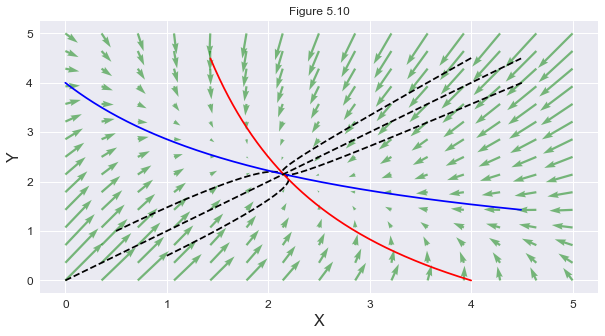

In [12]:
n=1
for i, u0 in enumerate(initial_values):
    U = odeint(ToggleSwitch, u0, time,
               args=(Bx,By,A,K,n))
    plt.plot(U[:,0], U[:,1], c='k', ls='--' )


plt.plot(time[time<=4.5],Bx*Hill_repressor(time[time<=4.5],K,n), c='b')
plt.plot(Bx*Hill_repressor(time[time<=4.5],K,n), time[time<=4.5], c='r')
plt.plot(time[time<=4.5],time[time<=4.5], c='k', ls='--')

xs = np.linspace(0, 5, 15)
ys = np.linspace(0, 5, 15)

d_x = np.array([[Bx*Hill_repressor(y,K,n) - A * x for x in xs] for y in ys])
d_y = np.array([[By*Hill_repressor(x,K,n) - A * y for x in xs] for y in ys])

plt.quiver(xs, ys, d_x, d_y, 
           alpha = 0.5, color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Figure 5.10')

plt.show()